In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

**Show all rows**

In [58]:
#Show all rows and columns
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

## Data exploration

**Read csv**

In [3]:
survey = pd.read_csv('Dataset/Mental Health in Tech - OSMI 2020.csv')

In [5]:
survey.head(5)

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with 

In [6]:
survey.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 120 columns):
 #    Column                                                                                                                                                                                                                            Dtype  
---   ------                                                                                                                                                                                                                            -----  
 0    #                                                                                                                                                                                                                                 object 
 1    *Are you self-employed?*                                                                                                                                                

In [7]:
print("Number of rows: {}, Number of columns: {}".format(survey.shape[0], survey.shape[1]))

Number of rows: 180, Number of columns: 120


##### Find countries column

In [8]:
user_country = survey["What country do you *live* in?"].value_counts()

Lets plot the countries to have a better understanding

https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values/51535326#51535326

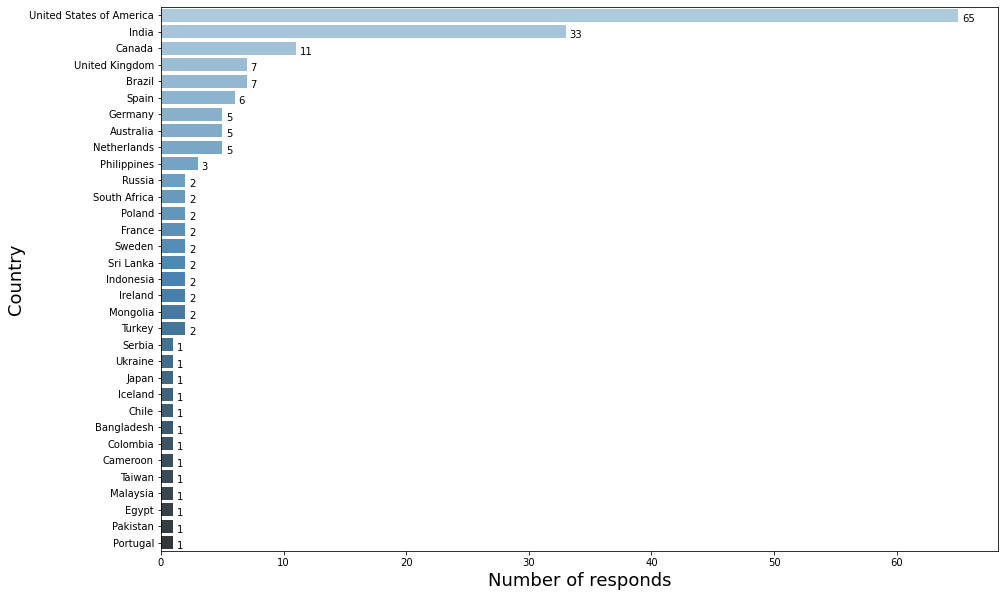

In [9]:
plt.figure(figsize=(15, 10))
sns_country = sns.barplot(x=user_country.values, y=user_country.index, palette=("Blues_d"))
plt.xlabel("Number of responds", fontsize=18)
plt.ylabel("Country", fontsize=18)

def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(sns_country, "h", 0.3)

## Data cleaning

In [50]:
survey["Other.1"].unique()

array([nan])

In [51]:
survey["Other.2"].unique()

array([nan, 'Autism Spectrum Disorder'], dtype=object)

In [52]:
#Check how many times "Autism Spectrum Disorder" appears in the df
(survey["Other.2"].values == "Autism Spectrum Disorder").sum()

1

In [59]:
survey.loc[survey["Other.2"] == "Autism Spectrum Disorder"]

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?",Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?,Have you ever discussed your mental health with your employer?,"Describe the conversation you had with your employer about your mental health, including their reactions and what actions were taken to address your mental health issue/questions.",Would you feel comfortable discussing a mental health issue with your coworkers?,Have you ever discussed your mental health with coworkers?,Describe the conversation with coworkers you had about your mental health including their reactions.,Have you ever had a coworker discuss their or another coworker's mental health with you?,Describe the conversation your coworker had with you about their mental health (please do not use names).,"Overall, how much importance does your employer place on physical health?","Overall, how much importance does your employer place on mental health?",Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?,Do you know local or online resources to seek help for a mental health issue?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health disorder to a client or business contact, how has this affected you or the relationship?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health disorder to a coworker or employee, how has this impacted you or the relationship?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",*Do you have previous employers?*,Was your employer primarily a tech company/organization?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Did you ever discuss your mental health with your previous employer?,"Describe the conversation you had with your previous employer about your mental health, including their reactions and actions taken to address your mental health issue/questions.",Would you have been willing to discuss your mental health with 

In [4]:
survey["Other.3"].unique()

array([nan, 'Latino '], dtype=object)

In [54]:
#Check which user inserted Latino, there should be a race column 
#survey.index[survey["Other.3"]== "Latino "] #Get only the index
survey.loc[survey["Other.3"] == "Latino "] #Gets more information about the user

,#,*Are you self-employed?*,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided health coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health disorders and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,...,"If there is anything else you would like to tell us that has not been covered by the survey questions, please use this space to do so.",Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used _anonymously_ and only with your permission.),What is your age?,What is your gender?,What country do you *live* in?,What US state or territory do you *live* in?,What is your race?,Other.3,What country do you *work* in?,What US state or territory do you *work* in?
39,vqwnlmwccmj4yhvybbp9vqwnlmeh3a8n,0,More than 1000,1.0,1.0,Yes,Yes,Yes,Yes,I don't know,...,NaN,0,34,Male,United States of America,New York,Latino,Latino,United States of America,New York


In [48]:
#Check what user 39's value for race
#survey["What is your race?"][survey.index[39]]

In [49]:
#Fill in "Latino" value for user 39 in race column
survey.loc[[39], "What is your race?"] = "Latino"

In [17]:
#Check how many times "Latino " appears in the df (Note: it has whitespace)
(survey["Other.3"].values == "Latino ").sum()

1

In [21]:
#Make a list of columns to drop
columns_to_drop = ["Other.1", "Other.3", "Other.3"]

In [20]:
#Remove columns 
survey = survey.drop(columns_to_drop, axis=1)

In [25]:
#survey.head(5) #Double check to see if columns have been removed

##### Find gender column

In [26]:
#Make all values to lowercase and see the unique values
user_gender = survey["What is your gender?"].str.lower().unique()
user_gender

array(['male', 'female', 'f', nan, 'mail', 'm', 'woman',
       'female, she/her', 'mostly male', 'cisgender male'], dtype=object)

In [30]:
#Categorize gender into: male, female, other
male_str = ["male", "mail", "m", "mostyl male", "cisgender male"]
fmale_str = ["female", "f", "woman", "she/her"]
other_str = ["nan"]

#Iterate through dataset and change the values
for (row, column) in survey.iterrows():
    
    if str.lower(column["What is your gender?"]) in male_str:
        survey["What is your gender?"].replace(to_replace=column["What is your gender?"],
                                              value="male", inplace=True)

TypeError: descriptor 'lower' for 'str' objects doesn't apply to a 'float' object

**Let's have a closer look at the column titles and their data types**

In [14]:
column_titles = survey.columns.tolist()
for index, title in enumerate(column_titles):
    print(index, title)

0 #
1 *Are you self-employed?*
2 How many employees does your company or organization have?
3 Is your employer primarily a tech company/organization?
4 Is your primary role within your company related to tech/IT?
5 Does your employer provide mental health benefits as part of healthcare coverage?
6 Do you know the options for mental health care available under your employer-provided health coverage?
7 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
8 Does your employer offer resources to learn more about mental health disorders and options for seeking help?
9 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
10 If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?
11 Would you feel more comfortable talking to your coworkers about yo

In [15]:
column_dtype = survey.dtypes
column_dtype

#                                                                                                                                                                                                                                    object
*Are you self-employed?*                                                                                                                                                                                                              int64
How many employees does your company or organization have?                                                                                                                                                                           object
Is your employer primarily a tech company/organization?                                                                                                                                                                             float64
Is your primary role within your company related to tech

In [16]:
# survey.loc[:, survey.dtypes==object] #Find the columns with dataype of object